# 🧩 Confidence Interval Comparisons using statsmodels + seaborn

In [1]:
# Setup and Imports

import pandas as pd
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt

# ✅ Setup paths
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Imports
from utils.model_utils import fit_ols_model, compute_confidence_interval
from utils.visual_utils import plot_ci_errorbar, save_and_show_plot, plot_ci_barplot
from utils.model_utils import export_model_summary_as_text

In [2]:
# Paths
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/common_ci_comparison")
EXPORT_TABLES = Path("../exports/tables/common_ci_comparison")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 📥 Step 1: Load Data and Create Group Labels

In [3]:
# Load Data and Create Group Labels
df = pd.read_csv(DATA_PATH / "ols_data.csv")
df['group'] = ['A' if i < len(df)//2 else 'B' for i in range(len(df))]
df.head()

,X1,X2,y,group
0,5.993428,11.073362,0.847148,A
1,4.723471,11.682354,0.008497,A
2,6.295377,13.249154,2.176524,A
3,8.046060,13.161406,4.926576,A
4,4.531693,5.866992,4.015547,A


## 📊 Step 2: CI Plot using Seaborn

/Users/satvikpraveen/Desktop/Libraries/StatsmodelsMasterPro/utils/visual_utils.py:90: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=df, x=x_col, y=y_col, ci=ci, capsize=0.2)


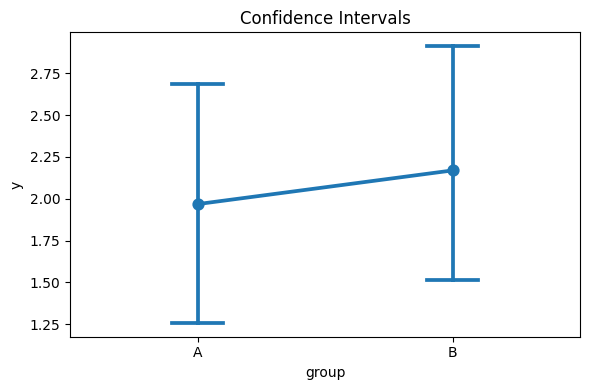

<Figure size 640x480 with 0 Axes>

In [4]:
# Point Plot with CI using Seaborn
plot_ci_errorbar(df, x_col="group", y_col="y", ci=95)
save_and_show_plot("group_mean_ci", EXPORT_PLOTS)

## 📊 Step 3: Bar Plot with CI using Seaborn

/Users/satvikpraveen/Desktop/Libraries/StatsmodelsMasterPro/utils/visual_utils.py:98: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x=x_col, y=y_col, ci=ci, capsize=0.1)


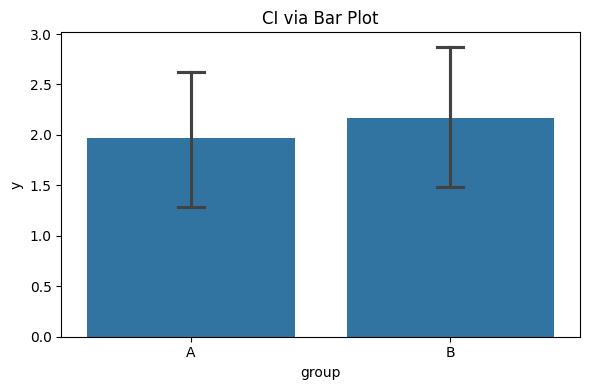

<Figure size 640x480 with 0 Axes>

In [5]:
# Bar Plot with CI using Seaborn
plot_ci_barplot(df, x_col="group", y_col="y", ci=95, title="CI via Bar Plot")
save_and_show_plot("ci_barplot", EXPORT_PLOTS)

## 📉 Step 4: CI Calculation using statsmodels

In [6]:
# CI Calculation using statsmodels
model = fit_ols_model("y ~ group", df)
ci_df = compute_confidence_interval(model)
ci_df.columns = ["Lower Bound", "Upper Bound"]
ci_df.to_csv(EXPORT_TABLES / "ols_ci_table.csv")
display(ci_df)

,Lower Bound,Upper Bound
Intercept,1.275028,2.661315
group[T.B],-0.778833,1.181672


In [7]:
# Export model summary as well
export_model_summary_as_text(model, EXPORT_TABLES / "ols_summary.txt")

## 📈 Step 5: Plot CI of Regression Coefficients (Visual Format)

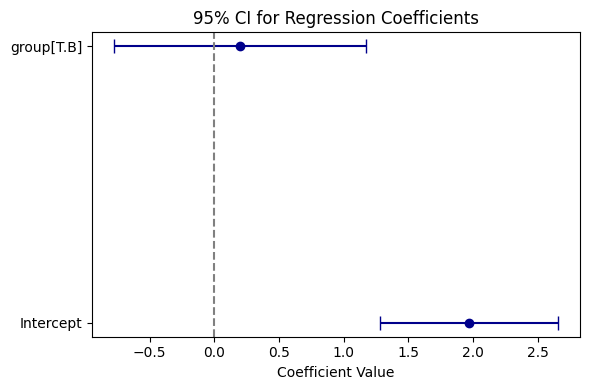

In [8]:
# Plot CI of Regression Coefficients (Visual Format)
coefs = model.params
errors = model.bse
labels = coefs.index
ci_bounds = 1.96 * errors  # 95% CI approximation

plt.figure(figsize=(6, 4))
plt.errorbar(x=coefs, y=labels, xerr=ci_bounds, fmt="o", capsize=5, color="darkblue")
plt.axvline(x=0, color='gray', linestyle='--')
plt.title("95% CI for Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
save_and_show_plot("ci_regression_coefficients", EXPORT_PLOTS)

## ✅ Summary:
- Loaded data and added synthetic group labels
- Used Seaborn to visualize 95% confidence intervals across groups
- Used `statsmodels` to extract numerical confidence intervals
- Exported model summary and CI table